In [2]:
# import modules
import pandas as pd
import numpy as np

In [3]:
# dataframe
df = pd.read_excel("all_questions.xlsx")
df.head()


,id,previous_5_turn,question,next_5_turn,categorie,annotateur,commentaire,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,#spk4 : monsieur,#spk4 : depuis combien de temps habitez-vous O...,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé,Valentin,NaN,NaN,NaN,préparé,spontané,non-question,poubelle
1,2,#spk4 : monsieur | #spk4 : depuis combien de t...,#spk4 : vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé,Valentin,NaN,NaN,NaN,494,745,292,262
2,3,#spk4 : monsieur | #spk4 : depuis combien de t...,#spk4 : pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané,Valentin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,#spk4 : et est-ce que vous comptez rester à O...,#spk1 : oh je suis obligé par ma profession | ...,préparé,Valentin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,#spk1 : bah parce que // j'ai // j'ai toujours...,#spk4 : et qu'est ce que vous faites comme tra...,#spk1 : je suis contrôleur divisionnaire aux P...,spontané,Valentin,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# étiquettes questions
df["categorie"].unique()

array(['préparé', 'spontané', 'non-question', 'poubelle', nan],
      dtype=object)

In [5]:
# deux colonnes index: il faut en supprimer une
df.reset_index(drop=True, inplace=True)
df = df.drop("id", axis=1)

In [6]:
# suppression des colonnes inutiles
df = df.drop(df.filter(regex=("Unnamed:|commentaire")), axis=1)
df = df.fillna(0)

# supression des #spk :
for i in range(len(df["question"])):
    df["question"][i] = df["question"][i][8:]
df.head()

,previous_5_turn,question,next_5_turn,categorie,annotateur
0,#spk4 : monsieur,depuis combien de temps habitez-vous Orléans ?,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé,Valentin
1,#spk4 : monsieur | #spk4 : depuis combien de t...,vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé,Valentin
2,#spk4 : monsieur | #spk4 : depuis combien de t...,pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané,Valentin
3,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,et est-ce que vous comptez rester à Orléans ?,#spk1 : oh je suis obligé par ma profession | ...,préparé,Valentin
4,#spk1 : bah parce que // j'ai // j'ai toujours...,et qu'est ce que vous faites comme travail ?,#spk1 : je suis contrôleur divisionnaire aux P...,spontané,Valentin


In [7]:
ann = df["annotateur"] != 0
miss_ann = np.sum(ann)
print(f"Dans ce corpus, on a un total de {miss_ann} questions non annotées par un annotateur.")
df = df[ann]


Dans ce corpus, on a un total de 1948 questions non annotées par un annotateur.


In [8]:
# enlever les donnees inutiles
df = df.drop(df.filter(regex=("annotateur")), axis=1)
df = df.fillna(0)
df

,previous_5_turn,question,next_5_turn,categorie
0,#spk4 : monsieur,depuis combien de temps habitez-vous Orléans ?,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé
1,#spk4 : monsieur | #spk4 : depuis combien de t...,vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé
2,#spk4 : monsieur | #spk4 : depuis combien de t...,pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané
3,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,et est-ce que vous comptez rester à Orléans ?,#spk1 : oh je suis obligé par ma profession | ...,préparé
4,#spk1 : bah parce que // j'ai // j'ai toujours...,et qu'est ce que vous faites comme travail ?,#spk1 : je suis contrôleur divisionnaire aux P...,spontané
...,...,...,...,...
4302,#spk1 : et euh vous alliez à l'école à pieds o...,et est-ce que il y a un un souvenir euh que v...,#spk1 : est-ce qu'il y a un chose une chose q...,préparé
4303,#spk1 : et euh vous alliez à l'école à pieds o...,est-ce qu'il y a un chose une chose qui vous ...,#spk2 : moi un très bon souvenir enfin justeme...,préparé
4304,#spk1 : et euh vous alliez à l'école à pieds o...,et un très mauvais souvenir est-ce que vous av...,#spk2 : de l'école primaire non. non non vraim...,préparé
4305,#spk2 : oui j'allais à l'école à pieds j'étais...,et et qu'est-ce que vous faisiez après l'écol...,#spk1 : euh à quelle heure vous commenciez le...,préparé


In [9]:
# sauvegarde au format csv
df.reset_index(drop=True, inplace=True)
df.to_csv("corpus_clean.csv")


In [10]:
# deux sous corpus
prep = df[df["categorie"] == "préparé"]
df.reset_index(drop=True, inplace=True)
df.to_csv("corpus_prep.csv")
spon = df[df["categorie"] == "spontané"]
df.reset_index(drop=True, inplace=True)
df.to_csv("corpus_spon.csv")


# Prétraitement des textes et verctorisations

In [12]:
# Charger les donnees
data = pd.read_csv("corpus_spon.csv")
data

,Unnamed: 0,previous_5_turn,question,next_5_turn,categorie
0,0,#spk4 : monsieur,depuis combien de temps habitez-vous Orléans ?,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,préparé
1,1,#spk4 : monsieur | #spk4 : depuis combien de t...,vous vous plaisez à Orléans ?,#spk4 : pourquoi ça ? | #spk1 : bah parce que ...,préparé
2,2,#spk4 : monsieur | #spk4 : depuis combien de t...,pourquoi ça ?,#spk1 : bah parce que // j'ai // j'ai toujours...,spontané
3,3,#spk1 : oh ça fait neuf ans depuis dix neuf ce...,et est-ce que vous comptez rester à Orléans ?,#spk1 : oh je suis obligé par ma profession | ...,préparé
4,4,#spk1 : bah parce que // j'ai // j'ai toujours...,et qu'est ce que vous faites comme travail ?,#spk1 : je suis contrôleur divisionnaire aux P...,spontané
...,...,...,...,...,...
1943,1943,#spk1 : et euh vous alliez à l'école à pieds o...,et est-ce que il y a un un souvenir euh que v...,#spk1 : est-ce qu'il y a un chose une chose q...,préparé
1944,1944,#spk1 : et euh vous alliez à l'école à pieds o...,est-ce qu'il y a un chose une chose qui vous ...,#spk2 : moi un très bon souvenir enfin justeme...,préparé
1945,1945,#spk1 : et euh vous alliez à l'école à pieds o...,et un très mauvais souvenir est-ce que vous av...,#spk2 : de l'école primaire non. non non vraim...,préparé
1946,1946,#spk2 : oui j'allais à l'école à pieds j'étais...,et et qu'est-ce que vous faisiez après l'écol...,#spk1 : euh à quelle heure vous commenciez le...,préparé


In [13]:
# vérifier si les données manuqantes
data.isnull().sum()

Unnamed: 0         0
previous_5_turn    0
question           0
next_5_turn        0
categorie          0
dtype: int64

In [14]:
import nltk 
import re

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("french")
import string
stopword = set(stopwords.words('french'))
stopword = set('')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kexingui/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("french")
import string
stopword = set(stopwords.words('french'))

def clean(question):
    question = str(question).lower()
    question = re.sub('\[.*?\]','',question)
    question = re.sub('https?://\S+|www\.\S+',"",question)
    question = re.sub('<.*?>+','',question)
    question = re.sub('[%s]' % re.escape(string.punctuation),'',question)
    question = re.sub('\n','',question)
    question = re.sub('\w*\d\w*','',question)
    question = [word for word in question.split(' ') if word not in stopword]
    question = " ".join(question)
    question = [stemmer.stem(word) for word in question.split(' ')]
    question = " ".join(question)
    return question

data["question"] = data["question"].apply(clean)
data["previous_5_turn"] = data["previous_5_turn"].apply(clean)
data["next_5_turn"] = data["next_5_turn"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kexingui/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
clustering_data = data[["question",]]
clustering_data

,question
0,depuis combien temp habitezvous orléan
1,plais à orléan
2,pourquoi ça
3,estce compt rest à orléan
4,quest fait comm travail
...,...
1943,estce a souven euh gard anné primair bon souv...
1944,estce quil a chos chos a gard dont gard tres ...
1945,tres mauv souven estce tres mauv souven
1946,questc fais apres lécol comment sorganis pet ...


# Test de l'algorithme clustering hiérarchique

In [19]:
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from itertools import cycle

In [20]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import FrenchStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

corpus = clustering_data["question"]

# application de la fonction TF-IDF
tokenizer = RegexpTokenizer(r"\w+")
stemmer = FrenchStemmer()
stopwords_fr = stopwords.words('french')
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stopwords_fr, analyzer="word", ngram_range=(1, 3), min_df=5, max_df=0.9)
X = vectorizer.fit_transform(corpus)


tf_idf = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out())


# merger avec le dataframe original
final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

1948 rows


,0,1,2,3,4,5,6,7,8,9,...,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947
combien temp,0.500637,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
depuis,0.475500,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temp,0.440857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
combien,0.422071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orléan,0.388283,1.0,0.0,0.580632,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.snowball import FrenchStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy as sch


In [21]:
corpus = clustering_data["question"]

# application de la fonction TF-IDF
tokenizer = RegexpTokenizer(r"\w+")
stemmer = FrenchStemmer()
stopwords_fr = stopwords.words('french')
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize, stop_words=stopwords_fr, analyzer="word", ngram_range=(1, 3), min_df=5, max_df=0.9)
X = vectorizer.fit_transform(corpus)


tf_idf = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names_out())


# merger avec le dataframe original
final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

1948 rows


,0,1,2,3,4,5,6,7,8,9,...,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947
combien temp,0.500637,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
depuis,0.475500,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
temp,0.440857,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
combien,0.422071,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orléan,0.388283,1.0,0.0,0.580632,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cluster 1: ['compren', 'éven', 'ensuit', 'entrepris', 'estce', 'estce aim', 'estce aim bien', 'estce cest', 'estce euh', 'estce fait']
Cluster 2: ['allo', 'éven', 'estce pouv racont', 'entrepris', 'estce', 'estce aim', 'estce aim bien', 'estce cest', 'estce euh', 'estce fait']
Cluster 3: ['tranch dâg', 'dâg', 'tranch', 'éven', 'estce pouv racont', 'estce pourr', 'estce peux', 'estce né région', 'estce né', 'estce habit']
Cluster 4: ['crois', 'mot', 'éven', 'estce pouv racont', 'estce', 'estce aim', 'estce aim bien', 'estce cest', 'estce euh', 'estce fait']
Cluster 5: ['scolair', 'éven', 'ensuit', 'entrepris', 'estce', 'estce aim', 'estce aim bien', 'estce cest', 'estce euh', 'estce fait']
Cluster 6: ['enfant', 'dun', 'éven', 'estce pouv racont', 'estce', 'estce aim', 'estce aim bien', 'estce cest', 'estce euh', 'estce fait']
Cluster 7: ['voyezvous', 'éven', 'estce pouv racont', 'entrepris', 'estce', 'estce aim', 'estce aim bien', 'estce cest', 'estce euh', 'estce fait']
Cluster 8: ['re

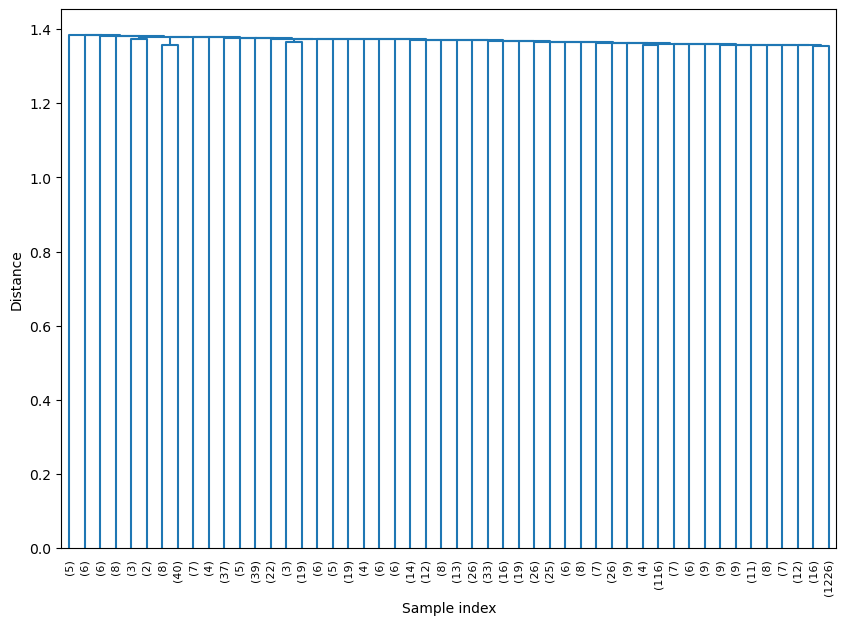

In [68]:
# Construction de l'arbre de clustering
linkage_matrix = linkage(X.todense(), 'average')
threshold = 1.6 * np.median(linkage_matrix[:, 2])
labels = fcluster(linkage_matrix, threshold, criterion='distance')

# Récupération des échantillons représentatifs de chaque cluster
representative_samples = []
for i in np.unique(labels):
    cluster_indices = np.where(labels == i)[0]
    cluster_distances = pairwise_distances(X[cluster_indices], metric='euclidean')
    representative_sample_index = cluster_indices[np.argmin(np.mean(cluster_distances, axis=0))]
    representative_samples.append(representative_sample_index)

# Extraction des caractéristiques représentatives de chaque cluster
representative_features = []
for i in np.unique(labels):
    representative_sample = X[representative_samples[i-1]].toarray().squeeze()
    feature_indices = np.argsort(representative_sample)[::-1][:10]  # 选择前10个TF-IDF值最高的特征
    feature_names = vectorizer.get_feature_names_out()
    representative_features.append([feature_names[idx] for idx in feature_indices])

# Impression des caractéristiques représentatives de chaque cluster
for i, features in enumerate(representative_features):
    print("Cluster {}: {}".format(i+1, features))

# Visualisation de l'arbre de clustering
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50, leaf_rotation=90., 
           leaf_font_size=8., labels=labels, no_labels=False)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
